In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv('car_data.csv')

data=data.drop("Unnamed: 0", axis='columns')

In [3]:
data.head()

,Model,Year,Status,Mileage,Price,MSRP
0,2022 Acura TLX A-Spec,2022,New,Not available,"$49,445","MSRP $49,445"
1,2023 Acura RDX A-Spec,2023,New,Not available,"$50,895",Not specified
2,2023 Acura TLX Type S,2023,New,Not available,"$57,745",Not specified
3,2023 Acura TLX Type S,2023,New,Not available,"$57,545",Not specified
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,Used,"32,675 mi.","$40,990",$600 price drop


In [4]:
'''We do not distinguish certification for simplicity. Used is used.'''

data.replace('New',0,inplace=True )

data.loc[data['Status'] != 0, 'Status'] = 1

In [5]:
'''We clean data so that we can formally apply primitive analysis first.'''

data['Price'] = data['Price'].str.replace(',','')


data['Price'] = data['Price'].str.replace('$','')


data.loc[data['Price'] == 'Not Priced', 'Price'] = 0


data['Price'] = data['Price'].astype(float)

'''Price is now a float.'''


data['Status'] = data['Status'].astype(float)


'''Status is now a float.'''


data['Mileage'] = data['Mileage'].str.replace(',','')


data['Mileage'] = data['Mileage'].str.replace('mi.','')


data.loc[data['Mileage'] == 'Not available', 'Mileage'] = 0


data['Mileage'] = data['Mileage'].astype(float)


'''Mileage is now a float.'''

data.head()

C:\Users\Owner\AppData\Local\Temp\ipykernel_15812\932341791.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Price'] = data['Price'].str.replace('$','')
C:\Users\Owner\AppData\Local\Temp\ipykernel_15812\932341791.py:26: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Mileage'] = data['Mileage'].str.replace('mi.','')


,Model,Year,Status,Mileage,Price,MSRP
0,2022 Acura TLX A-Spec,2022,0.0,0.0,49445.0,"MSRP $49,445"
1,2023 Acura RDX A-Spec,2023,0.0,0.0,50895.0,Not specified
2,2023 Acura TLX Type S,2023,0.0,0.0,57745.0,Not specified
3,2023 Acura TLX Type S,2023,0.0,0.0,57545.0,Not specified
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,1.0,32675.0,40990.0,$600 price drop


# Preliminary Correlation Analysis

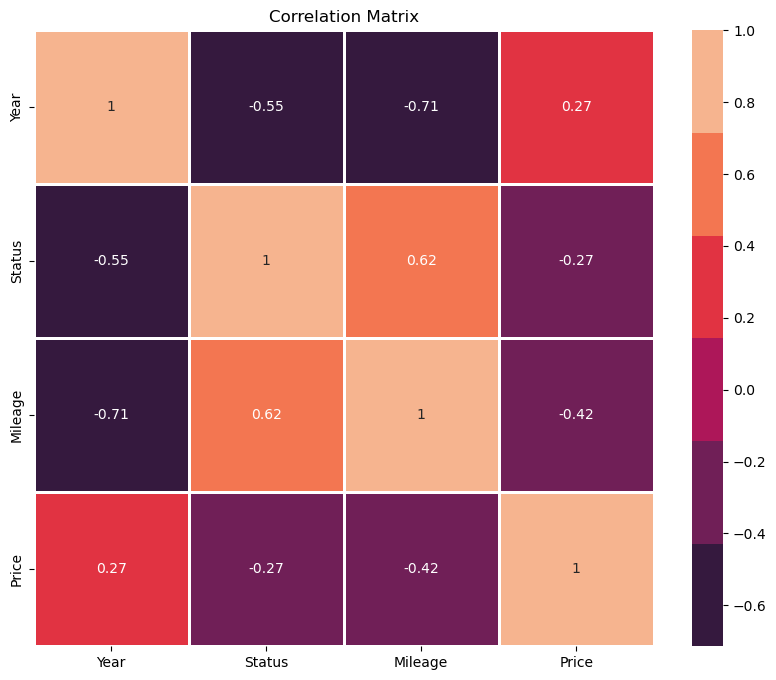

Average cost 51227.8267307061
Average Year 2019.7069072752718
Average Mileage 28203.58634957931
Proportion used 0.5866346469480486


In [6]:

correlation1=data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Correlation Matrix")

plt.show()

print('Average cost', data['Price'].mean())
print('Average Year',data['Year'].mean())
print('Average Mileage',data['Mileage'].mean() )
print('Proportion used', data['Status'].mean())

In [7]:
'''There are too many models to track, best to focus explicitly on brand for the purpose of analysis.'''

data['Brand'] = data['Model'].str[5:]

'''Removes year.'''

data['Brand']=data['Brand'].str.split(" ")

'''Removes spaces.'''

data['Brand'] = data['Brand'].str[0]

'''Grabs Brand.'''

'Grabs Brand.'

In [8]:
'''Partition according to Brand.'''

Acura_data=data[data['Brand']=='Acura']

print('Acura', Acura_data.shape)

BMW_data=data[data['Brand']=='BMW']

print('BMW', BMW_data.shape)

Chevrolet_data=data[data['Brand']=='Chevrolet']

print('Chevrolet', Chevrolet_data.shape)

Dodge_data=data[data['Brand']=='Dodge']

print('Dodge', Dodge_data.shape)

Ford_data=data[data['Brand']=='Ford']

print('Ford', Ford_data.shape)

Hyundai_data=data[data['Brand']=='Hyundai']

print('Hyundai', Hyundai_data.shape)

INFINITI_data=data[data['Brand']=='INFINITI']

print('INFINITI', INFINITI_data.shape)

Lexus_data=data[data['Brand']=='Lexus']

print('Lexus', Lexus_data.shape)

Mercedes_Benz_data=data[data['Brand']=='Mercedes-Benz']

print('Mercedes-Benz', Mercedes_Benz_data.shape)

Porsche_data=data[data['Brand']=='Porsche']

print('Porsche', Porsche_data.shape)

Tesla_data=data[data['Brand']=='Tesla']

print('Tesla', Tesla_data.shape)

Toyota_data=data[data['Brand']=='Toyota']

print('Toyota', Toyota_data.shape)

Volkswagen_data=data[data['Brand']=='Volkswagen']

print('Volkswagen', Volkswagen_data.shape)


Acura (9396, 7)
BMW (9883, 7)
Chevrolet (9999, 7)
Dodge (9873, 7)
Ford (4538, 7)
Hyundai (8300, 7)
INFINITI (8688, 7)
Lexus (9985, 7)
Mercedes-Benz (10100, 7)
Porsche (9992, 7)
Tesla (9170, 7)
Toyota (5828, 7)
Volkswagen (10010, 7)


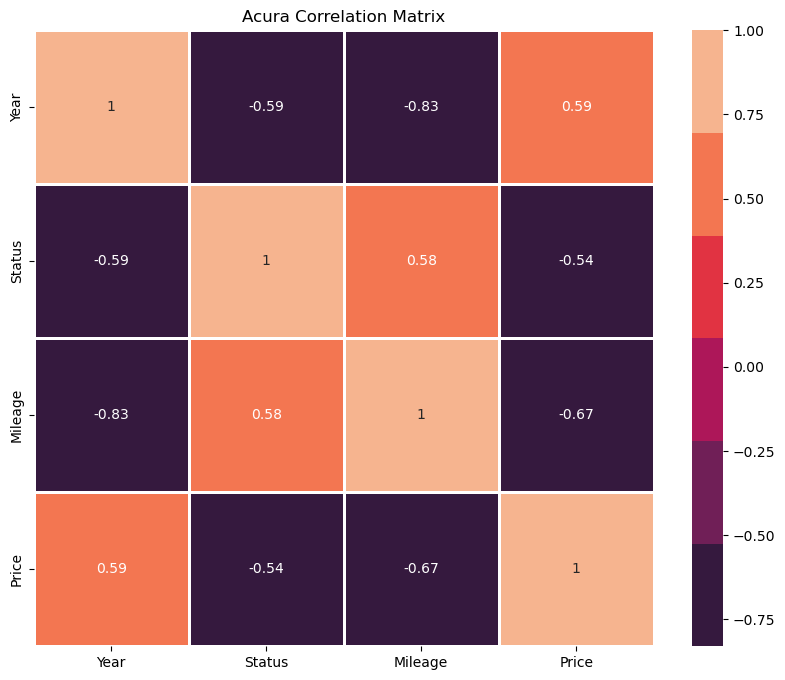

Average cost 37235.42060451256
Average Year 2019.3921881651768
Average Mileage 36813.02809706258
Proportion used 0.6758194976585781


In [9]:
'''Do correlation according to brand.'''

correlation1=Acura_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Acura Correlation Matrix")

plt.show()

print('Average cost', Acura_data['Price'].mean())
print('Average Year',Acura_data['Year'].mean())
print('Average Mileage',Acura_data['Mileage'].mean() )
print('Proportion used', Acura_data['Status'].mean())

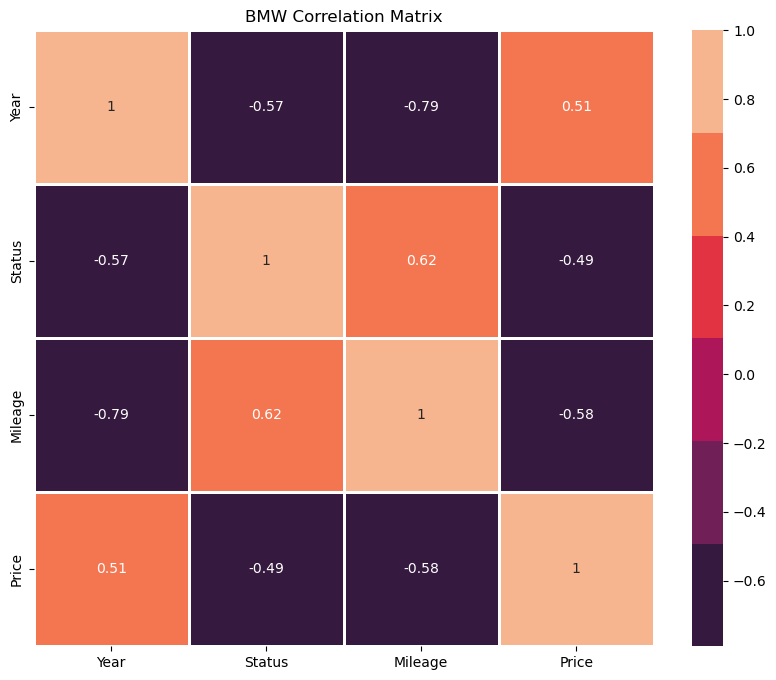

Average cost 57426.62572093494
Average Year 2019.5685520590914
Average Mileage 29224.276737832643
Proportion used 0.6638672467874127


In [10]:
correlation1= BMW_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("BMW Correlation Matrix")

plt.show()

print('Average cost', BMW_data['Price'].mean())
print('Average Year', BMW_data['Year'].mean())
print('Average Mileage', BMW_data['Mileage'].mean() )
print('Proportion used', BMW_data['Status'].mean())

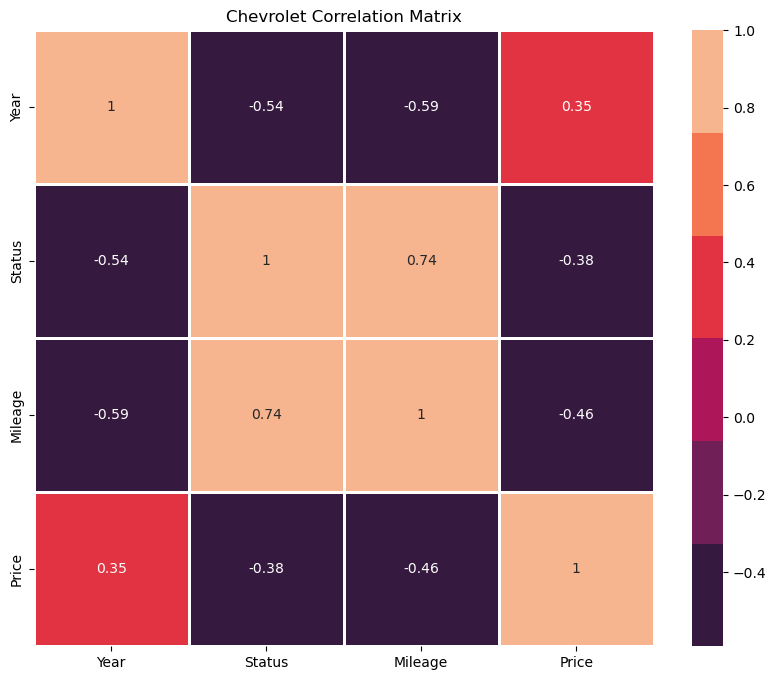

Average cost 47973.278327832784
Average Year 2020.850685068507
Average Mileage 16582.26332633263
Proportion used 0.30403040304030404


In [11]:
correlation1= Chevrolet_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Chevrolet Correlation Matrix")

plt.show()

print('Average cost', Chevrolet_data['Price'].mean())
print('Average Year', Chevrolet_data['Year'].mean())
print('Average Mileage', Chevrolet_data['Mileage'].mean() )
print('Proportion used', Chevrolet_data['Status'].mean())

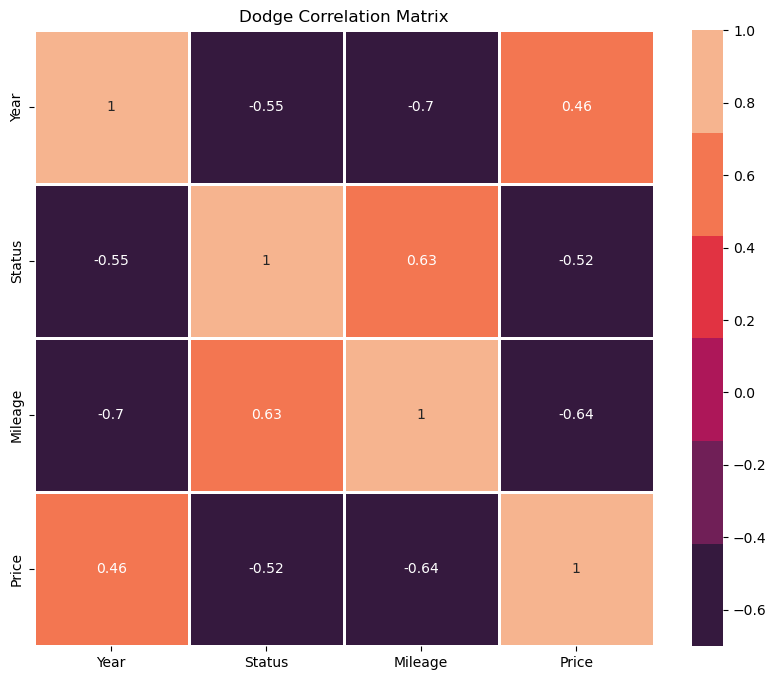

Average cost 38935.56649447989
Average Year 2018.9516864175023
Average Mileage 36823.888382457204
Proportion used 0.5878658968905095


In [12]:
correlation1= Dodge_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Dodge Correlation Matrix")

plt.show()

print('Average cost', Dodge_data['Price'].mean())
print('Average Year', Dodge_data['Year'].mean())
print('Average Mileage', Dodge_data['Mileage'].mean() )
print('Proportion used', Dodge_data['Status'].mean())

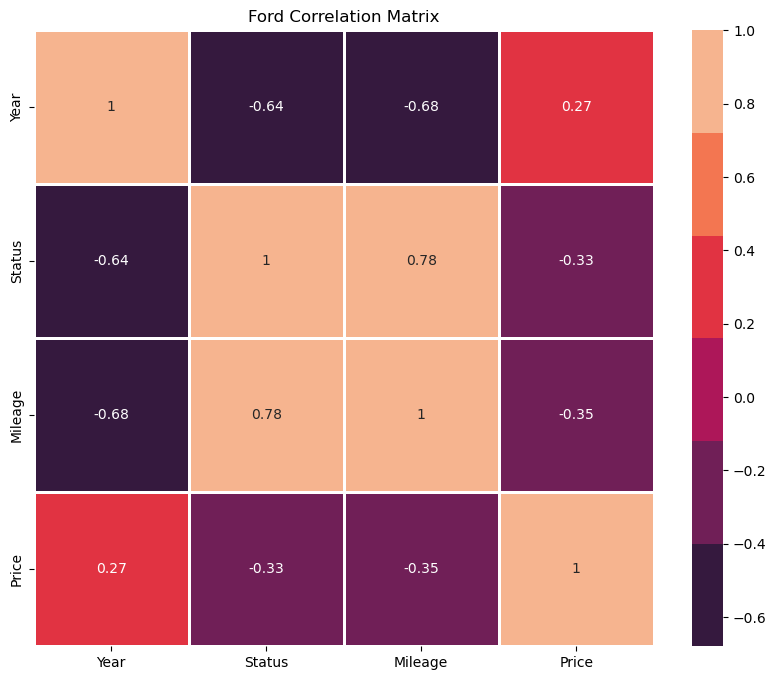

Average cost 57284.68907007492
Average Year 2021.8404583516967
Average Mileage 4695.846628470692
Proportion used 0.08660202732481269


In [13]:
correlation1= Ford_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Ford Correlation Matrix")

plt.show()

print('Average cost', Ford_data['Price'].mean())
print('Average Year', Ford_data['Year'].mean())
print('Average Mileage', Ford_data['Mileage'].mean() )
print('Proportion used', Ford_data['Status'].mean())

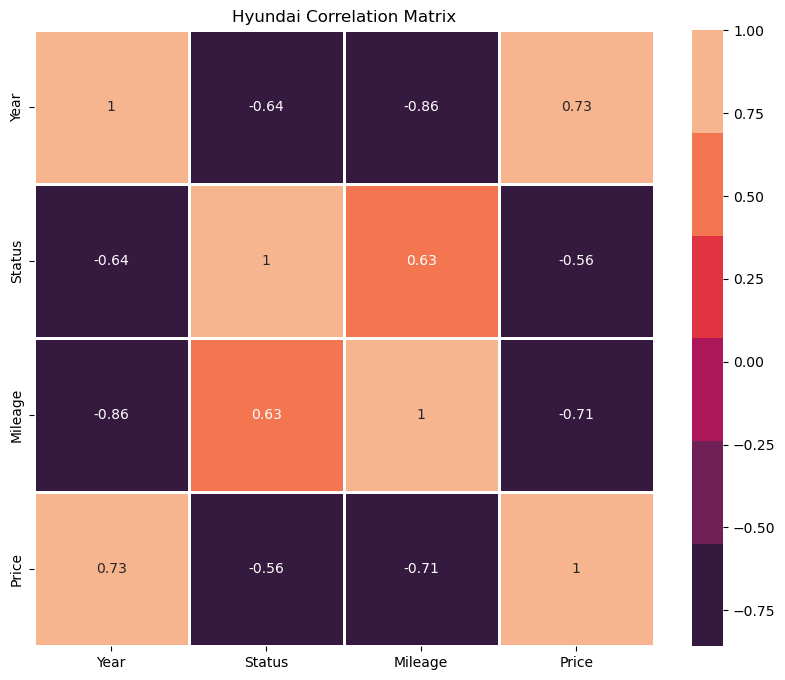

Average cost 30167.037108433735
Average Year 2020.5213253012048
Average Mileage 28055.460481927712
Proportion used 0.5987951807228916


In [14]:
correlation1= Hyundai_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Hyundai Correlation Matrix")

plt.show()

print('Average cost', Hyundai_data['Price'].mean())
print('Average Year', Hyundai_data['Year'].mean())
print('Average Mileage', Hyundai_data['Mileage'].mean() )
print('Proportion used', Hyundai_data['Status'].mean())

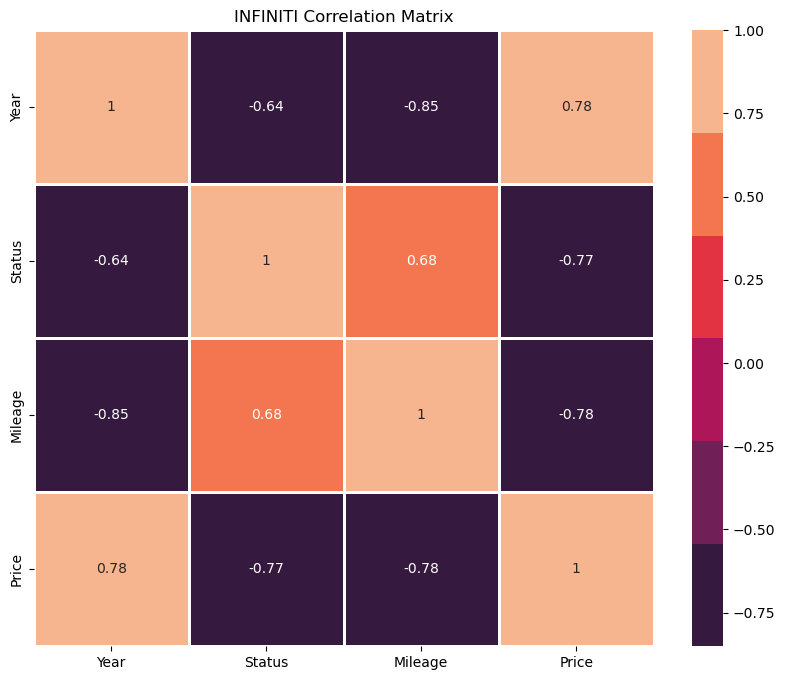

Average cost 41400.82861418048
Average Year 2019.346685082873
Average Mileage 39472.38547421731
Proportion used 0.6598756906077348


In [15]:
correlation1= INFINITI_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("INFINITI Correlation Matrix")

plt.show()

print('Average cost', INFINITI_data['Price'].mean())
print('Average Year', INFINITI_data['Year'].mean())
print('Average Mileage', INFINITI_data['Mileage'].mean() )
print('Proportion used', INFINITI_data['Status'].mean())

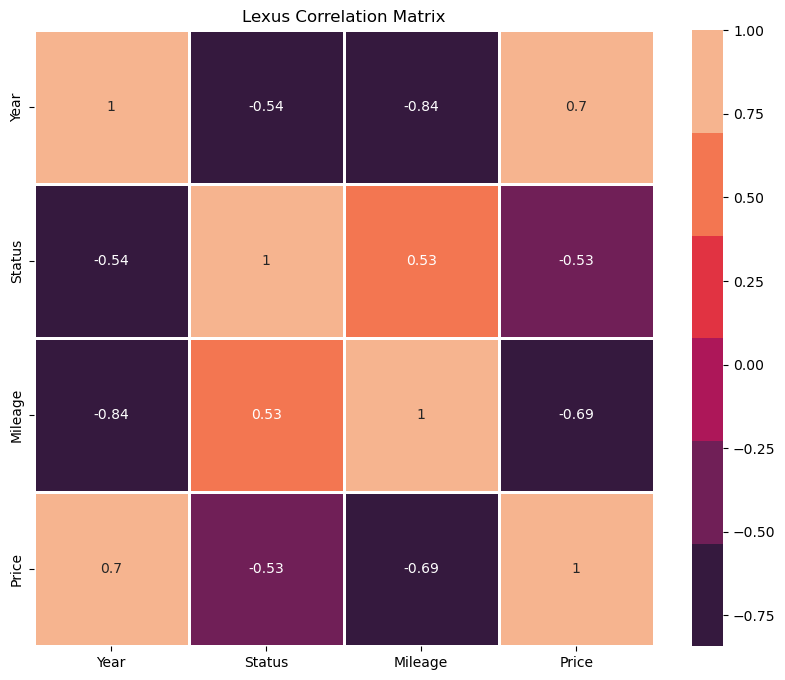

Average cost 41067.973059589385
Average Year 2018.2991487230847
Average Mileage 42516.67381071607
Proportion used 0.7726589884827241


In [16]:
correlation1= Lexus_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Lexus Correlation Matrix")

plt.show()

print('Average cost', Lexus_data['Price'].mean())
print('Average Year', Lexus_data['Year'].mean())
print('Average Mileage', Lexus_data['Mileage'].mean() )
print('Proportion used', Lexus_data['Status'].mean())

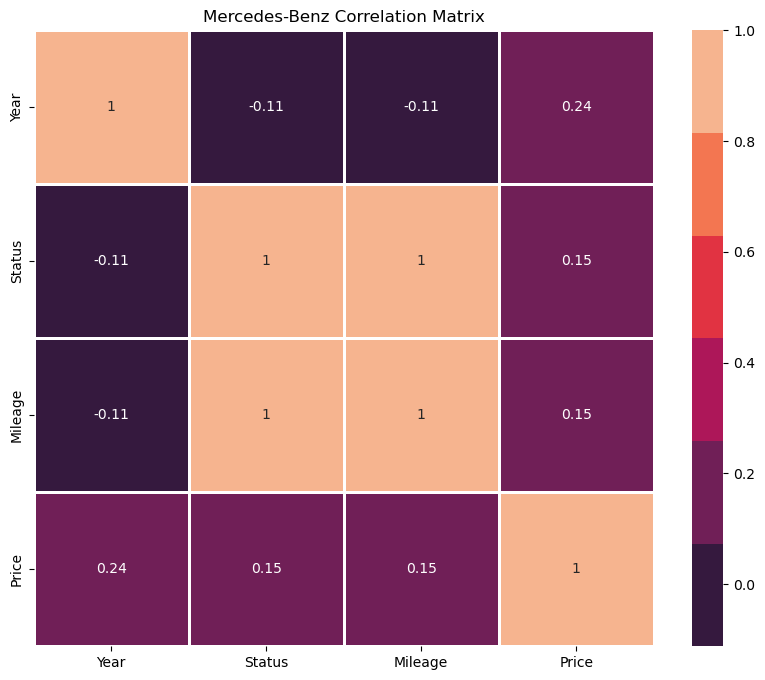

Average cost 98418.64811881188
Average Year 2022.610594059406
Average Mileage 3.0693069306930694
Proportion used 0.009900990099009901


In [17]:
correlation1= Mercedes_Benz_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Mercedes-Benz Correlation Matrix")

plt.show()

print('Average cost', Mercedes_Benz_data['Price'].mean())
print('Average Year', Mercedes_Benz_data['Year'].mean())
print('Average Mileage', Mercedes_Benz_data['Mileage'].mean() )
print('Proportion used', Mercedes_Benz_data['Status'].mean())

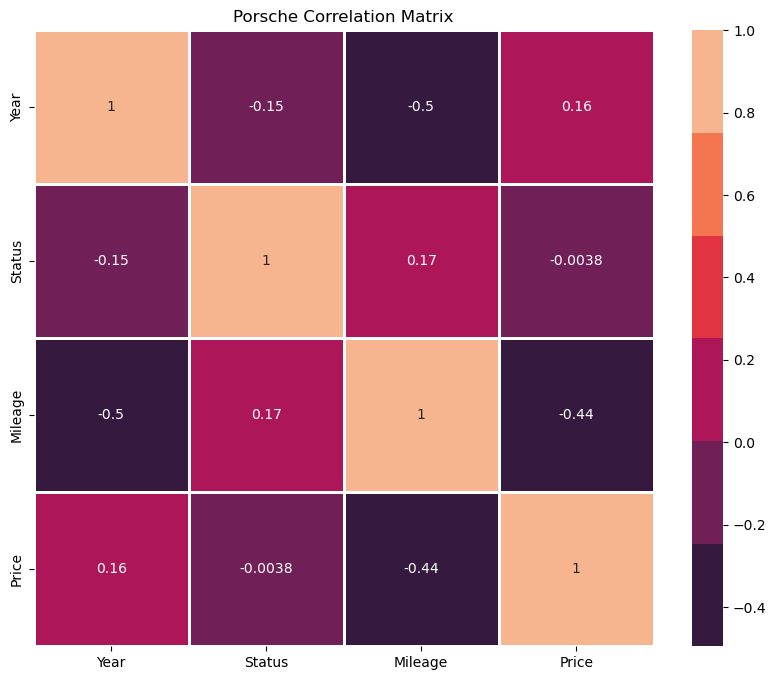

Average cost 87678.66923538831
Average Year 2016.4558646917535
Average Mileage 34069.08656925541
Proportion used 0.9753803042433947


In [18]:
correlation1= Porsche_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Porsche Correlation Matrix")

plt.show()

print('Average cost', Porsche_data['Price'].mean())
print('Average Year', Porsche_data['Year'].mean())
print('Average Mileage', Porsche_data['Mileage'].mean() )
print('Proportion used', Porsche_data['Status'].mean())

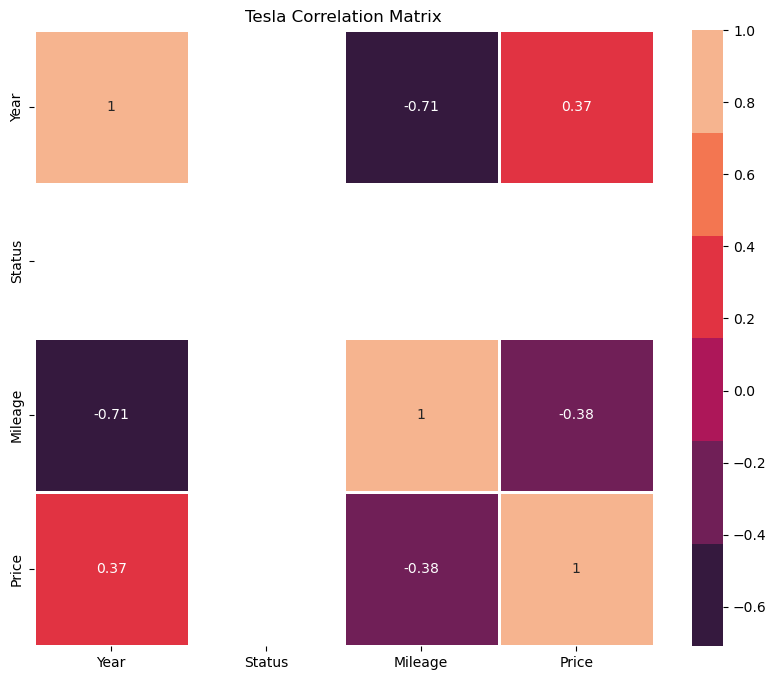

Average cost 49276.661941112325
Average Year 2019.1834242093785
Average Mileage 34270.15070883315
Proportion used 1.0


In [19]:
correlation1= Tesla_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Tesla Correlation Matrix")

plt.show()

print('Average cost', Tesla_data['Price'].mean())
print('Average Year', Tesla_data['Year'].mean())
print('Average Mileage', Tesla_data['Mileage'].mean() )
print('Proportion used', Tesla_data['Status'].mean())

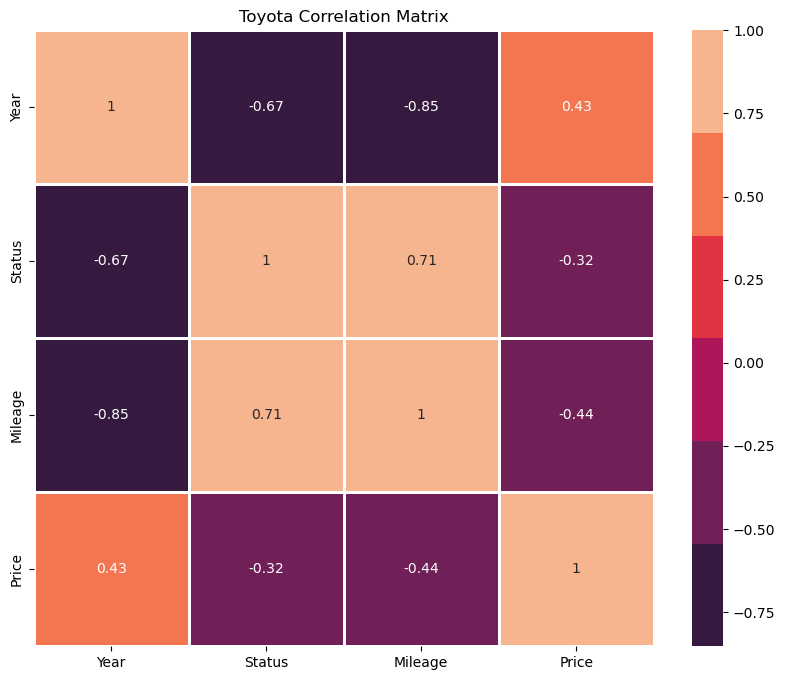

Average cost 41304.74502402196
Average Year 2021.393788606726
Average Mileage 15975.109643102265
Proportion used 0.29632807137954703


In [20]:
correlation1= Toyota_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Toyota Correlation Matrix")

plt.show()

print('Average cost', Toyota_data['Price'].mean())
print('Average Year', Toyota_data['Year'].mean())
print('Average Mileage', Toyota_data['Mileage'].mean() )
print('Proportion used', Toyota_data['Status'].mean())

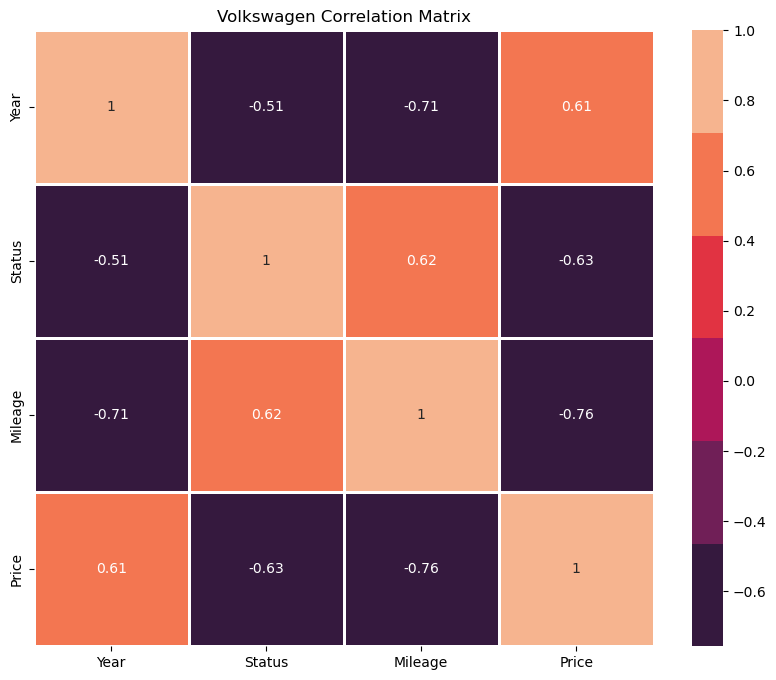

Average cost 30561.995604395604
Average Year 2019.6284715284714
Average Mileage 33104.08011988012
Proportion used 0.6594405594405595


In [21]:
correlation1= Volkswagen_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation1,annot=True,
            cmap=sns.color_palette("rocket"),
            linewidth=2,edgecolor="k")
plt.title("Volkswagen Correlation Matrix")

plt.show()

print('Average cost', Volkswagen_data['Price'].mean())
print('Average Year', Volkswagen_data['Year'].mean())
print('Average Mileage', Volkswagen_data['Mileage'].mean() )
print('Proportion used', Volkswagen_data['Status'].mean())

##### Conclusion: It seems luxury brands have strong correlations between price and usage, with the acceptions of Porsche and Volkswagen.

# Average Price Analysis

In [22]:
print(data['Year'].unique().tolist() )

[2022, 2023, 2019, 2016, 2020, 2008, 2014, 2021, 2015, 2018, 2017, 2011, 2013, 2012, 2006, 2007, 2009, 2010, 1997, 2003, 2004, 1992, 2002, 2005, 1998, 1991, 1996, 1993, 1994, 2001, 2000, 1999, 1986, 1979, 1987, 1988, 1989, 1968, 1972, 1983, 1976, 1995, 1982, 1980, 1960, 1969, 1967, 1971, 1970, 1973, 1957, 1955, 1977, 1990, 1974, 1984, 1963, 1953, 1949, 1985, 1966, 1975, 1964, 1958, 1962, 1981, 1961, 1978, 1965, 1959]


In [23]:
'''Let us list all years'''

years = data['Year'].unique().tolist()

years.sort()

print(years)

[1949, 1953, 1955, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]


In [24]:
'''Average cost per year.'''


mean_data = data.groupby(['Year'])['Price'].mean()

Acura_mean_data = Acura_data.groupby(['Year'])['Price'].mean()

BMW_mean_data = BMW_data.groupby(['Year'])['Price'].mean()

Chevrolet_mean_data = Chevrolet_data.groupby(['Year'])['Price'].mean()

Dodge_mean_data = Dodge_data.groupby(['Year'])['Price'].mean()

Ford_mean_data = Ford_data.groupby(['Year'])['Price'].mean()

Hyundai_mean_data = Hyundai_data.groupby(['Year'])['Price'].mean()

INFINITI_mean_data = INFINITI_data.groupby(['Year'])['Price'].mean()

Lexus_mean_data = Lexus_data.groupby(['Year'])['Price'].mean()

Mercedes_Benz_mean_data = Mercedes_Benz_data.groupby(['Year'])['Price'].mean()

Porsche_mean_data = Porsche_data.groupby(['Year'])['Price'].mean()

Tesla_mean_data = Tesla_data.groupby(['Year'])['Price'].mean()

Toyota_mean_data = Toyota_data.groupby(['Year'])['Price'].mean()

Volkswagen_mean_data = Volkswagen_data.groupby(['Year'])['Price'].mean()

mean_df = pd.DataFrame({ 'Average_Price': mean_data,
                        'Acura_Average_Price': Acura_mean_data,
                        'BMW_Average_Price': BMW_mean_data,
                        'Chevrolet_Average_Price': Chevrolet_mean_data,
                        'Ford_Average_Price': Ford_mean_data,
                        'Hyundai_Average_Price': Hyundai_mean_data,
                        'INFINITI_Average_Price': INFINITI_mean_data,
                        'Lexus_Average_Price': Lexus_mean_data,
                        'Mercedes_Benz_Average_Price': Mercedes_Benz_mean_data,
                        'Porsche_Average_Price': Porsche_mean_data,
                        'Tesla_Average_Price': Tesla_mean_data,
                        'Toyota_Average_Price': Toyota_mean_data,
                        'Volkswagen_Average_Price': Volkswagen_mean_data})




<AxesSubplot: xlabel='Year'>

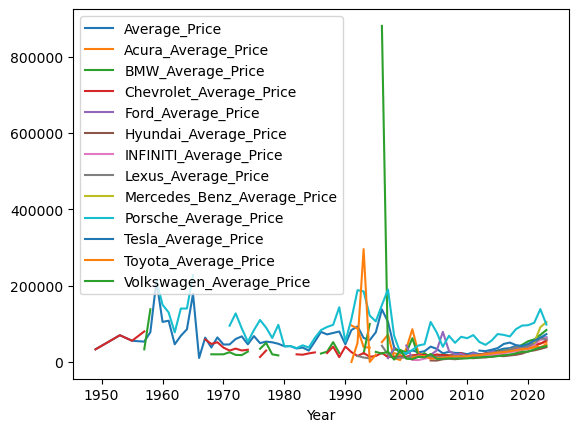

In [25]:
mean_df.plot.line()

In [26]:
'''Listing all dataframes to make life easier in future.'''

Brand_list = ['Acura','BMW',
              'Chevrolet', 'Dodge',
              'Ford', 'Hyundai',
              'INFINITI','Lexus',
              'Mercedes-Benz',
              'Porsche','Tesla',
              'Toyota','Volkswagen']

Brand_df_list = [Acura_data,  BMW_data, 
            Chevrolet_data, Dodge_data, Ford_data, 
            Hyundai_data, INFINITI_data, 
            Lexus_data, Mercedes_Benz_data, 
            Porsche_data, Tesla_data, 
            Toyota_data, Volkswagen_data]

mean_df_list = [Acura_mean_data, BMW_mean_data,
               Chevrolet_mean_data,Dodge_mean_data, Ford_mean_data,
               Hyundai_mean_data, INFINITI_mean_data,
               Lexus_mean_data, Mercedes_Benz_mean_data,
               Porsche_mean_data, Tesla_mean_data,
               Toyota_mean_data, Volkswagen_mean_data]

N= len(Brand_list)

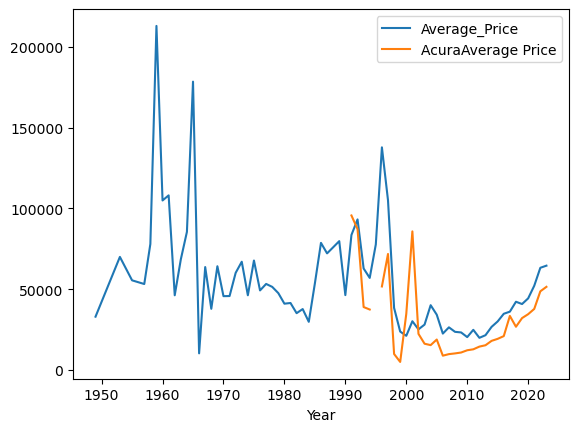

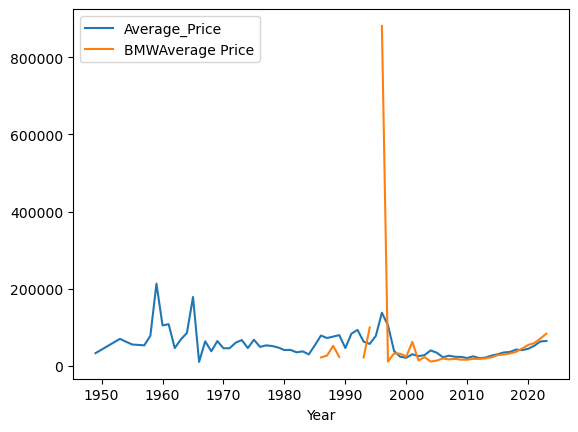

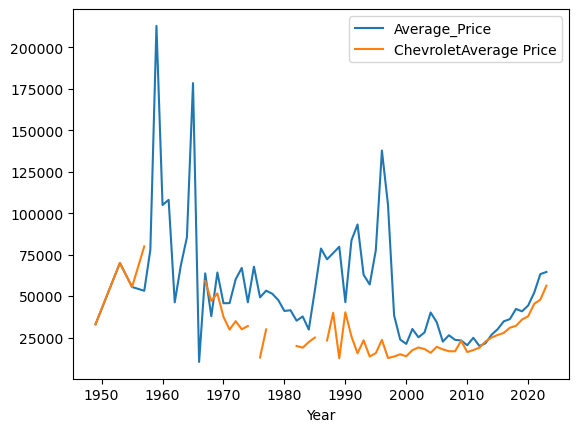

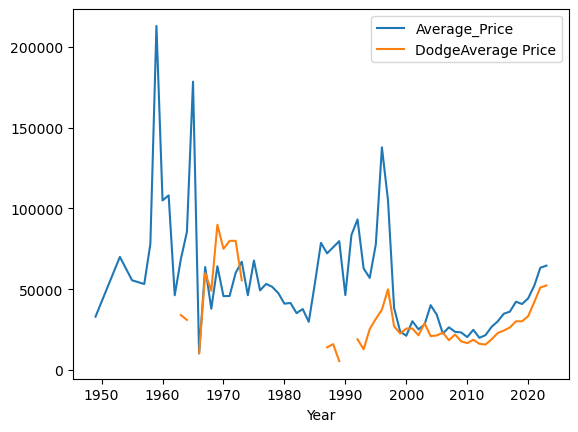

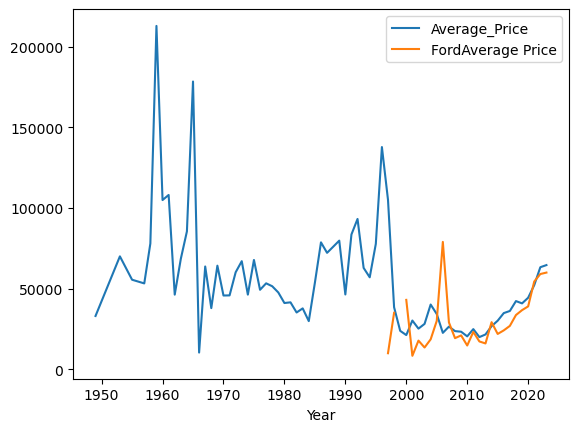

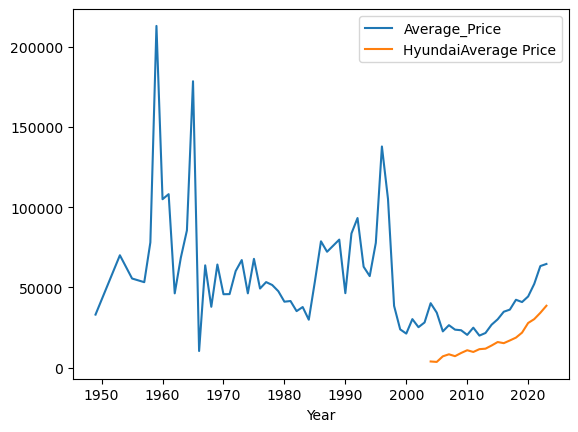

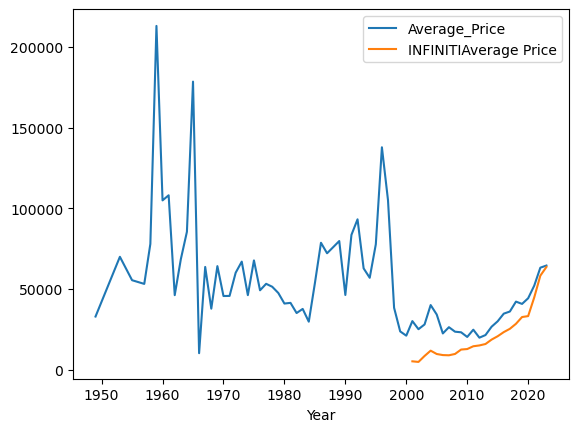

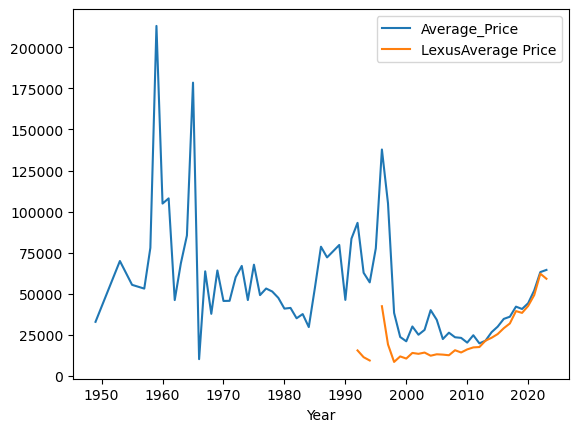

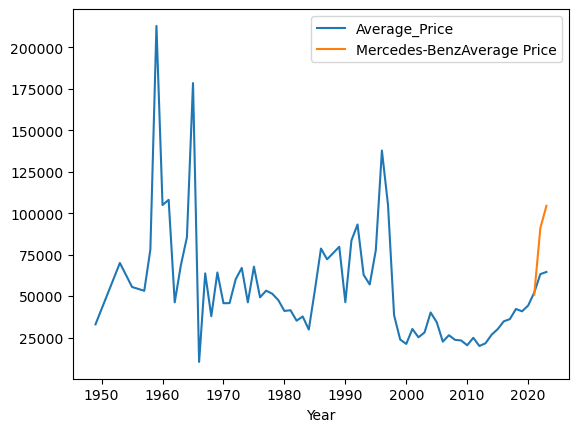

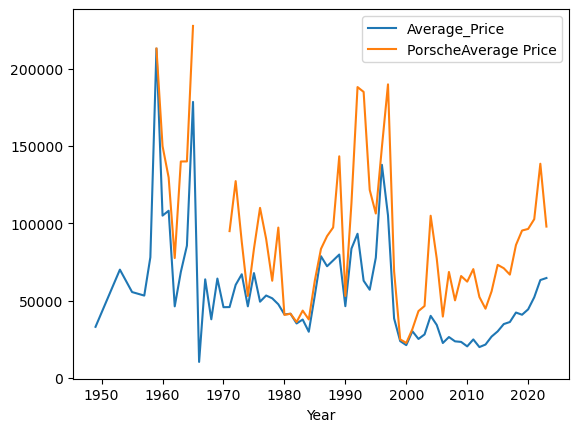

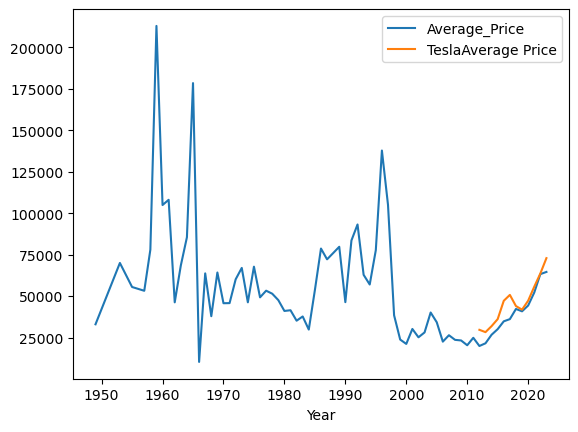

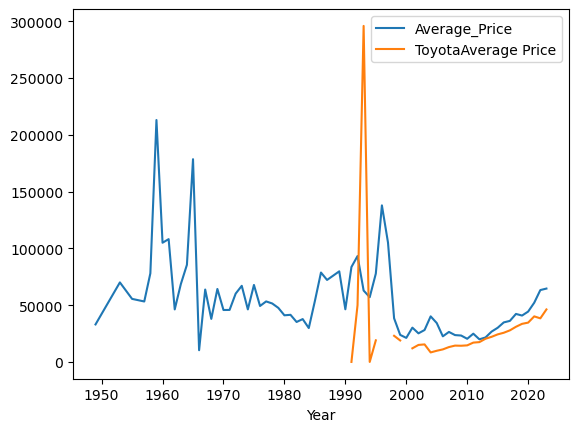

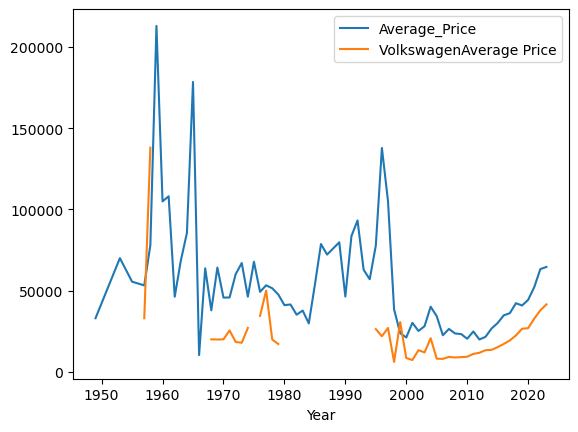

In [27]:
'''Compare individually to the global average.'''

for i in range(N):
    df = pd.DataFrame({'Average_Price': mean_data, Brand_list[i]+'Average Price': mean_df_list[i]})
    df.plot.line()

C:\Users\Owner\AppData\Local\Temp\ipykernel_15812\29041995.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Brand_df_list[j][i])
C:\Users\Owner\AppData\Local\Temp\ipykernel_15812\29041995.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Brand_df_list[j][i])
C:\Users\Owner\AppData\Local\Tem

C:\Users\Owner\AppData\Local\Temp\ipykernel_15812\29041995.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Brand_df_list[j][i])
C:\Users\Owner\AppData\Local\Temp\ipykernel_15812\29041995.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()
C:\Users\Owner\AppData\Local\Temp\ipykernel_15812\29041995.py:9: UserWarning: 

`distplot` is a deprecated function and wil

C:\Users\Owner\AppData\Local\Temp\ipykernel_15812\29041995.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Brand_df_list[j][i])
C:\Users\Owner\AppData\Local\Temp\ipykernel_15812\29041995.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Brand_df_list[j][i])
C:\Users\Owner\AppData\Local\Tem

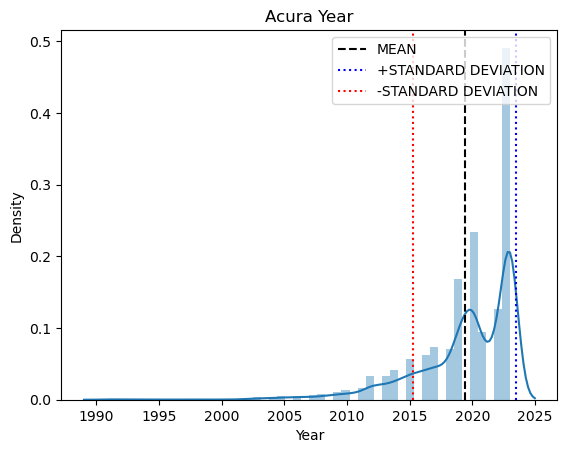

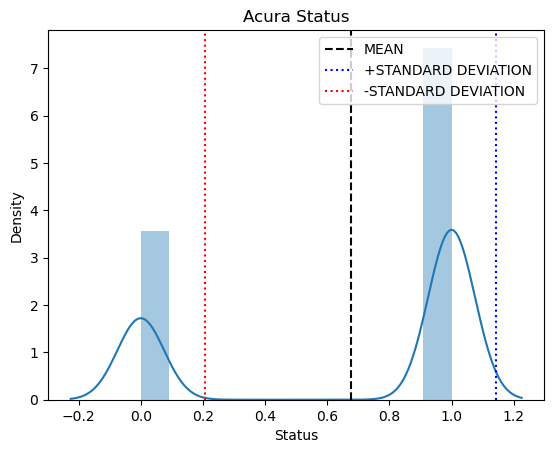

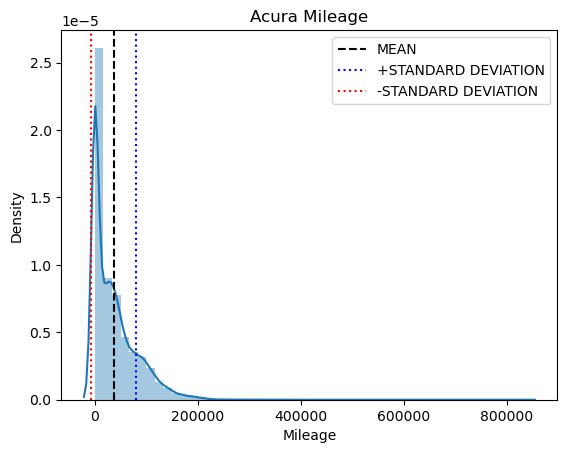

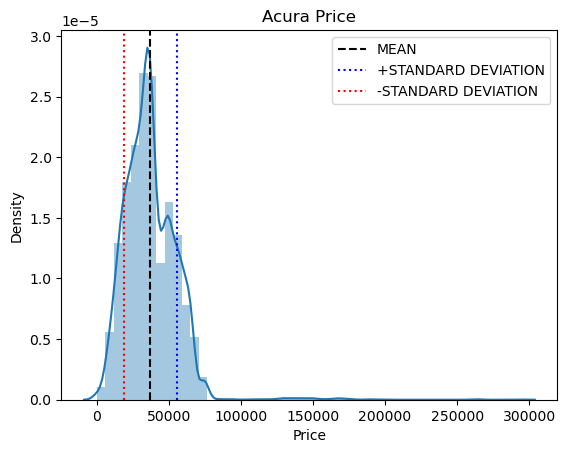

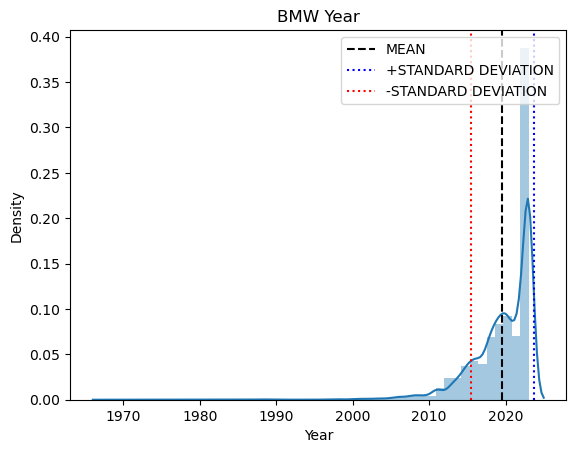

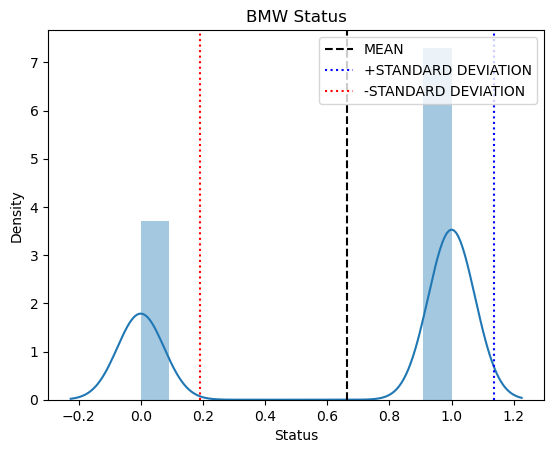

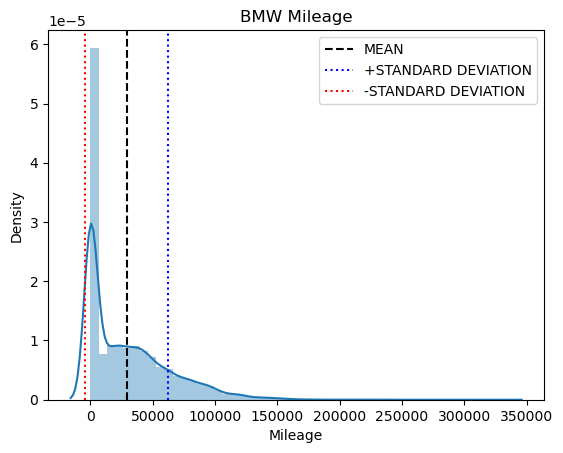

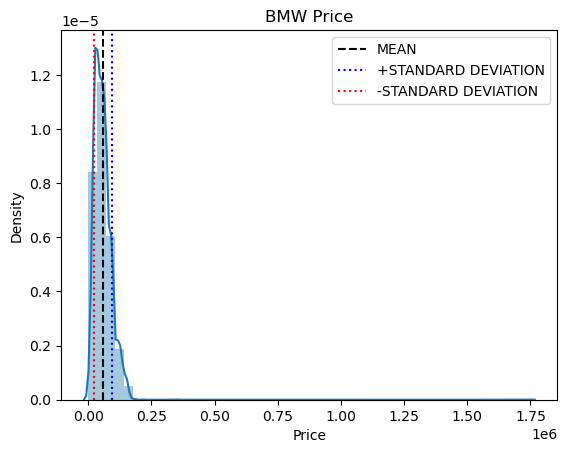

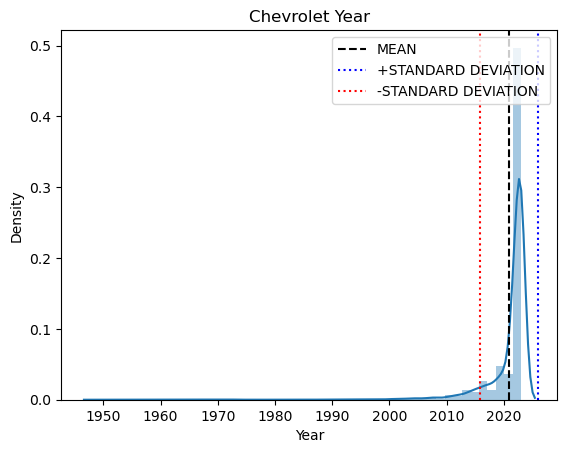

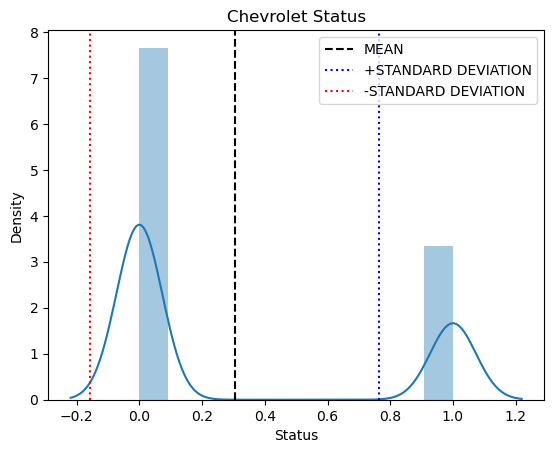

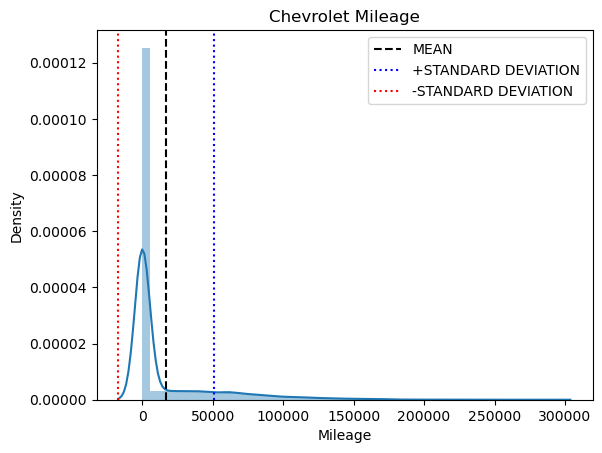

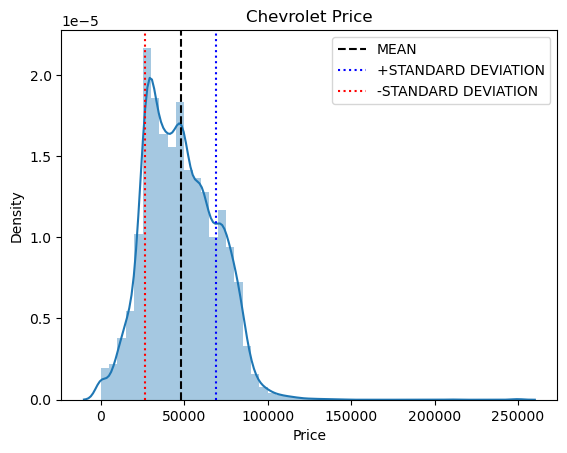

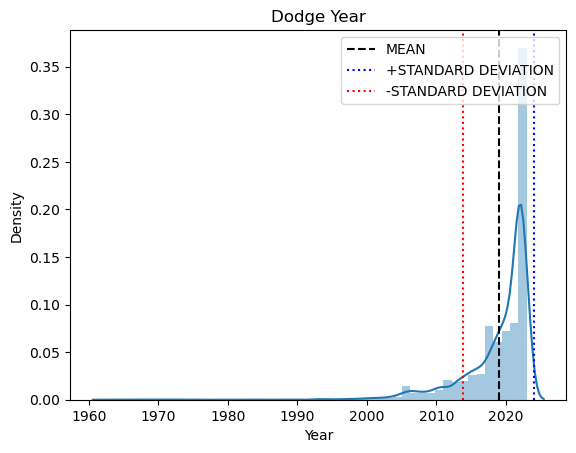

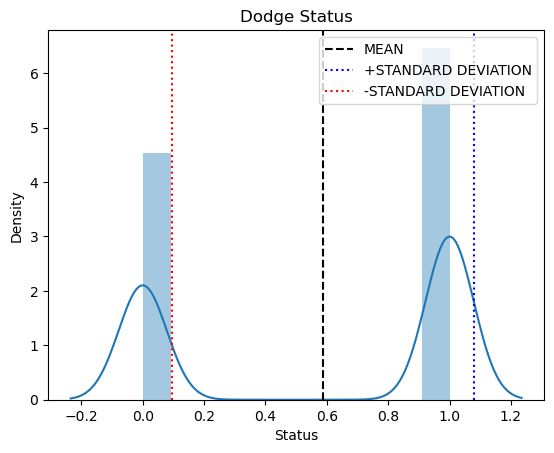

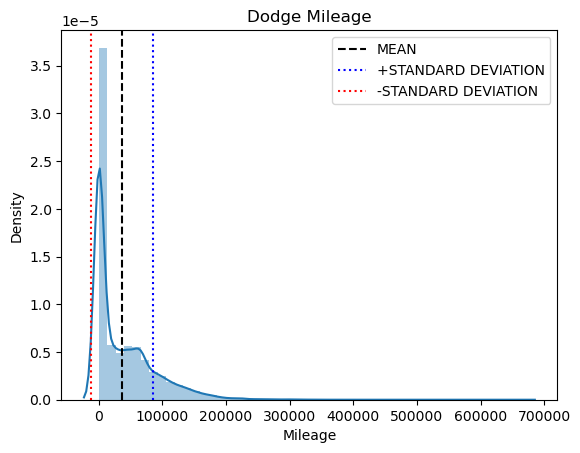

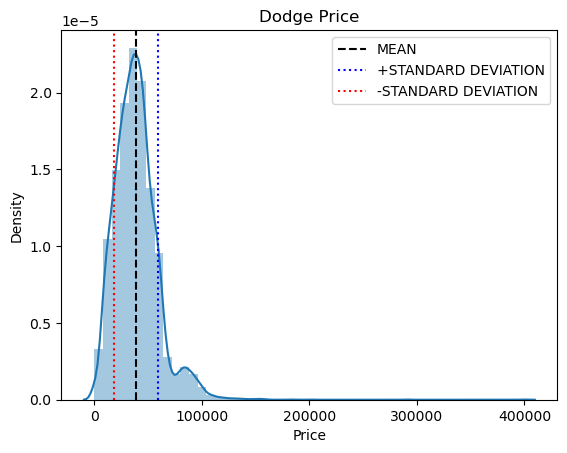

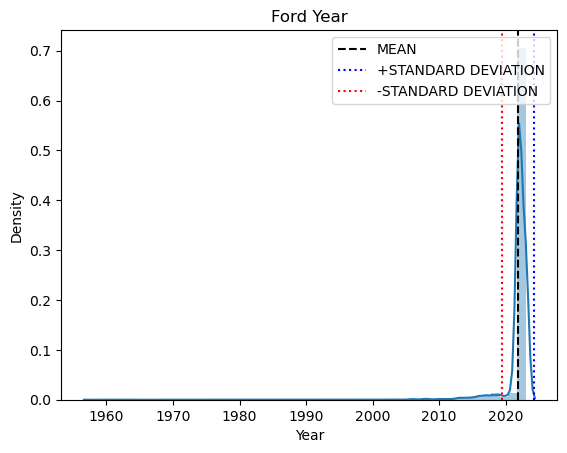

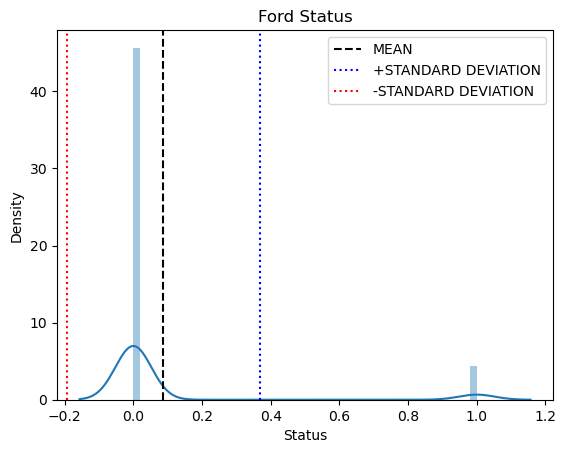

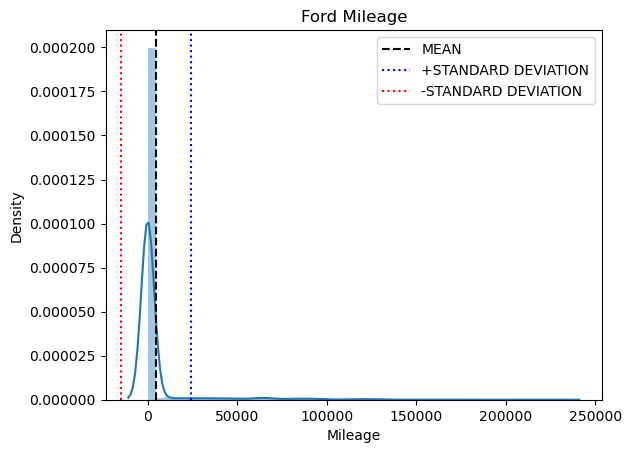

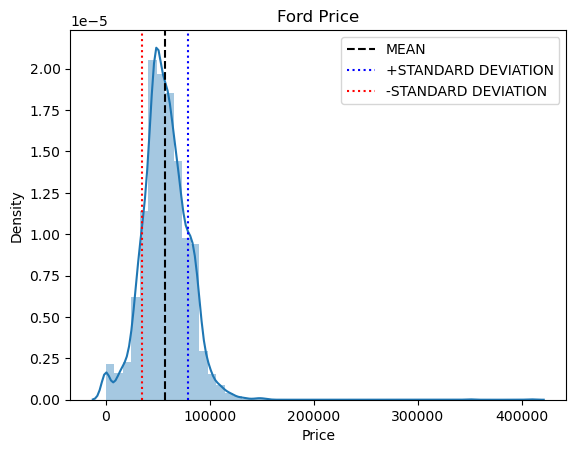

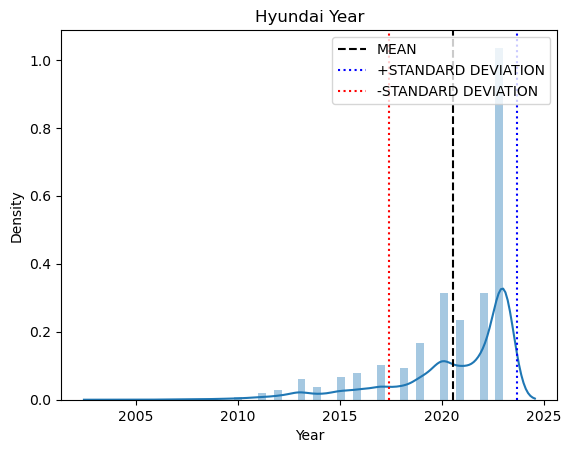

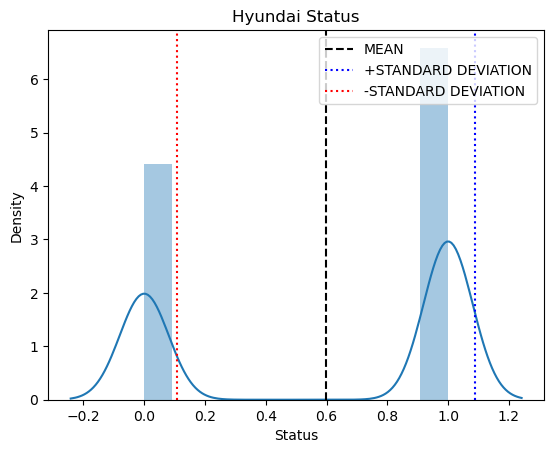

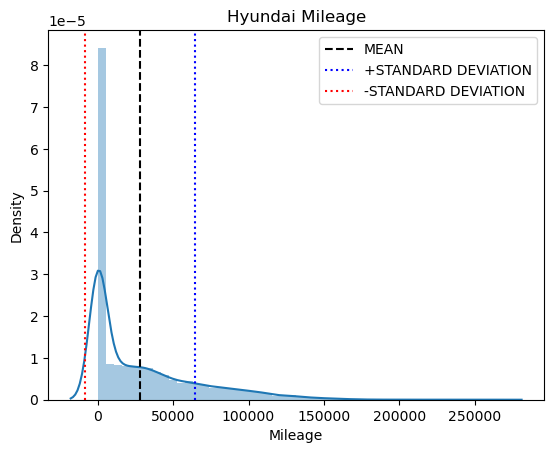

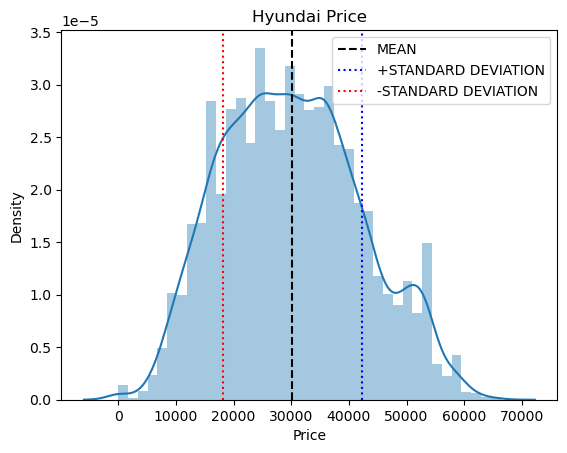

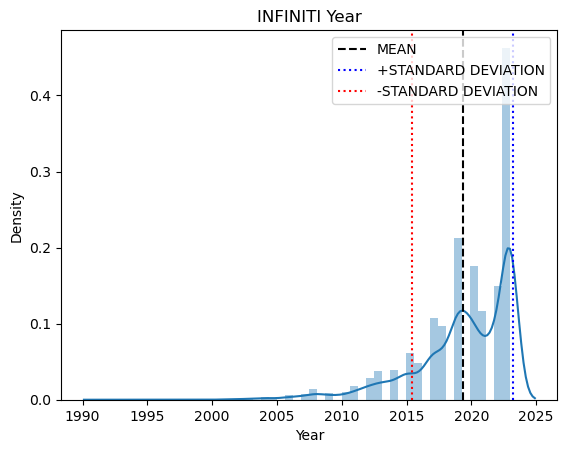

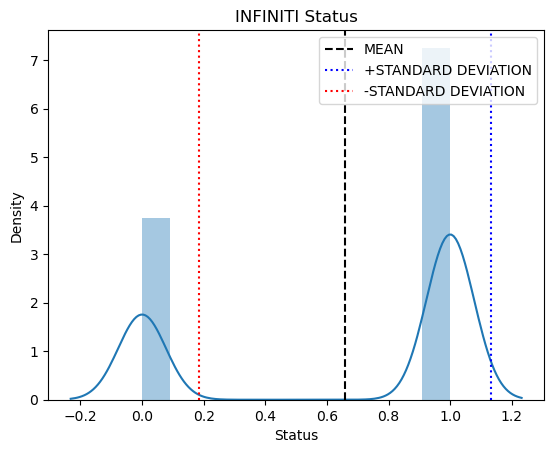

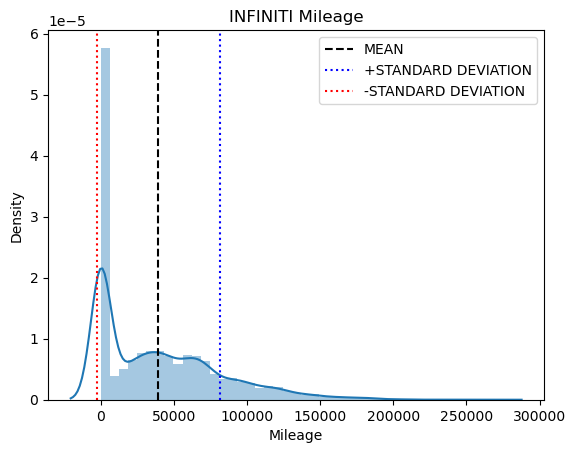

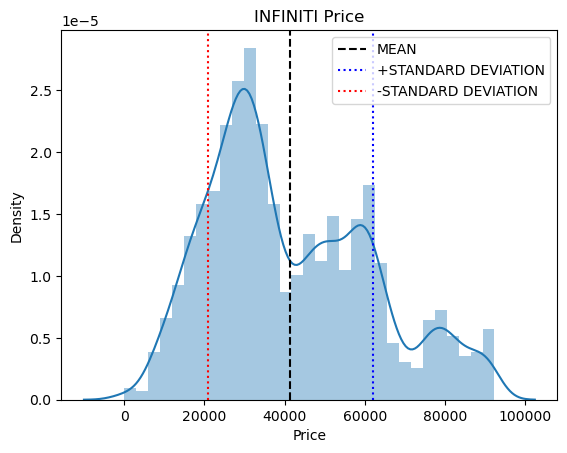

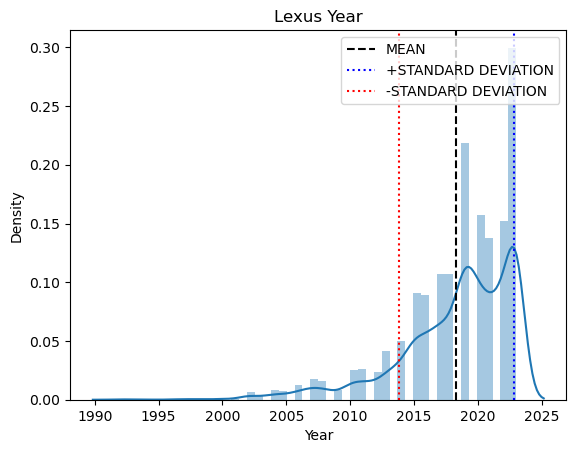

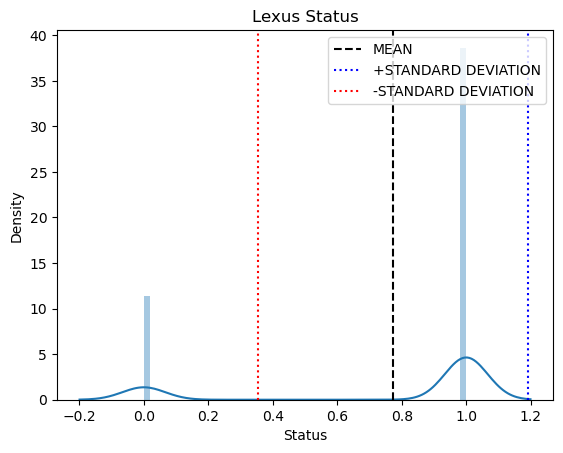

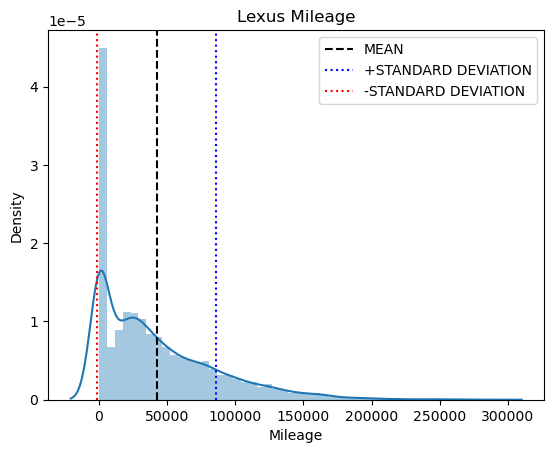

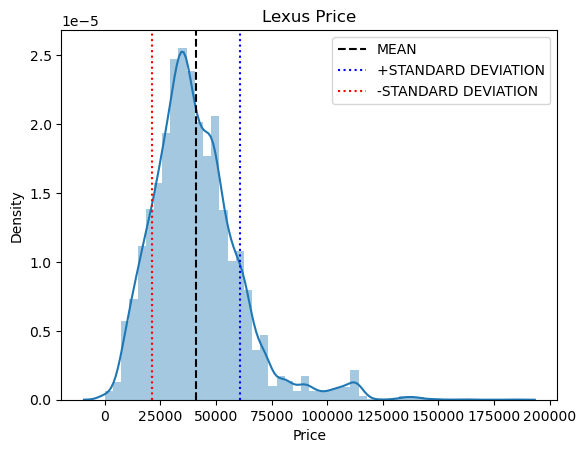

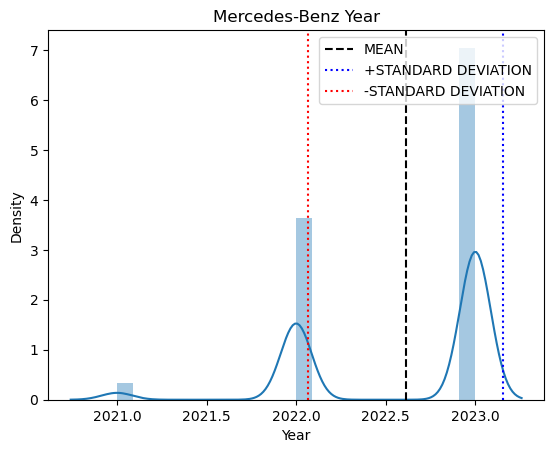

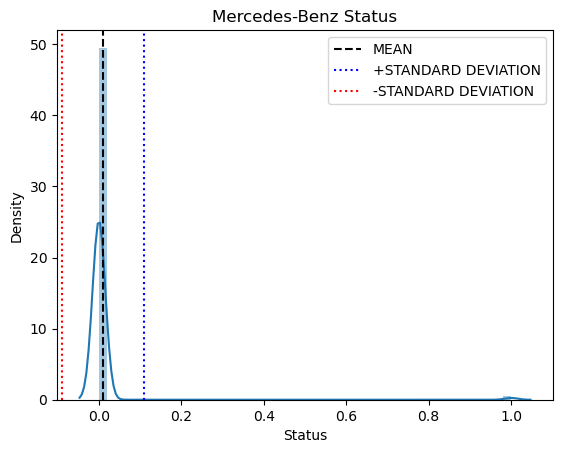

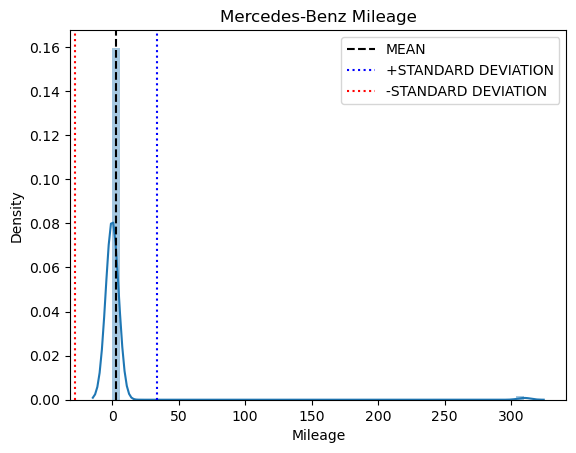

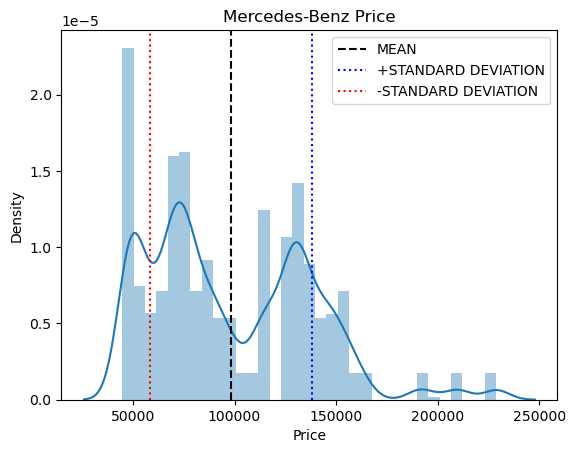

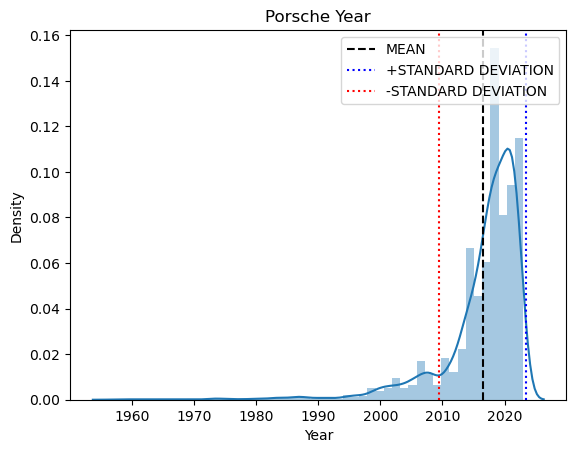

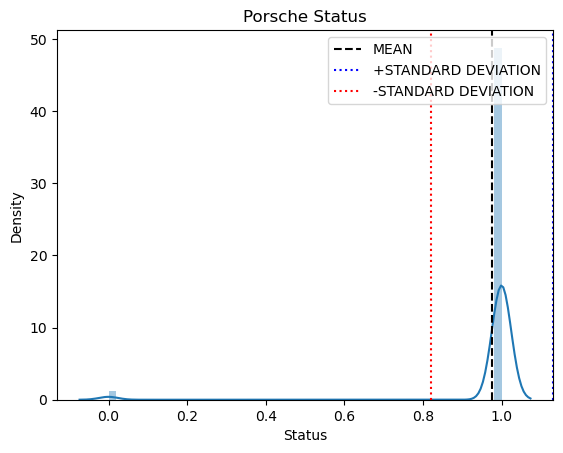

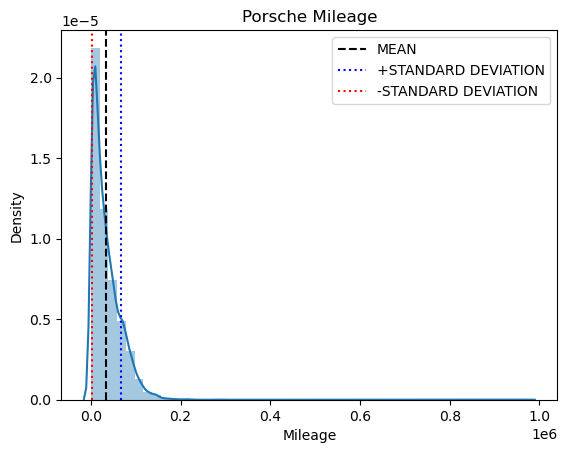

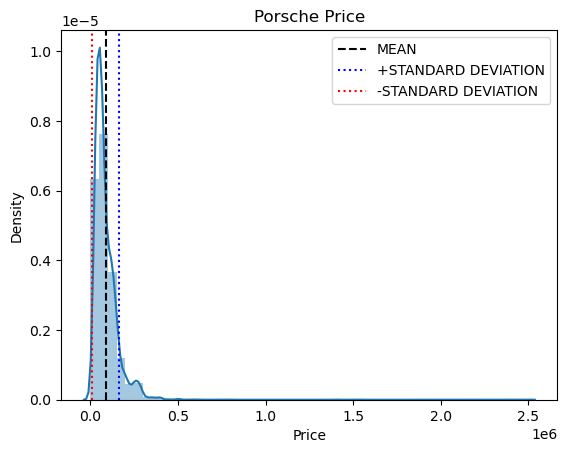

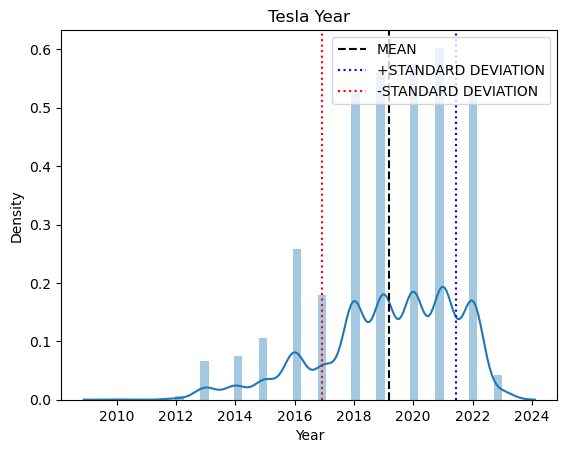

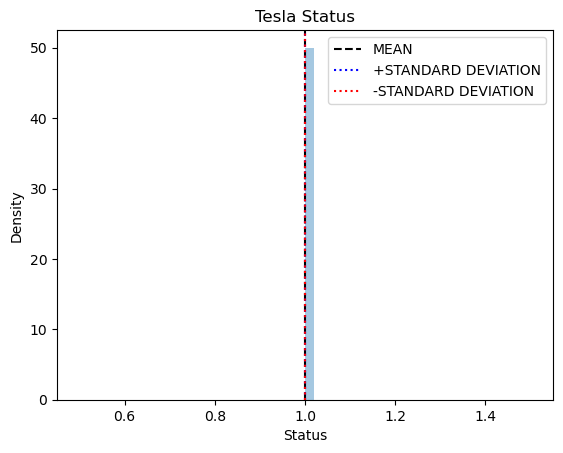

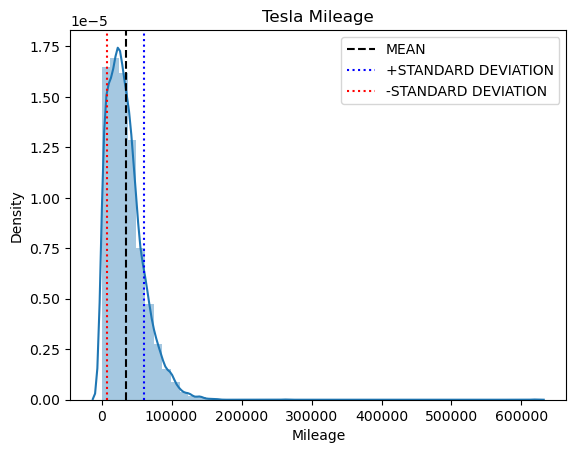

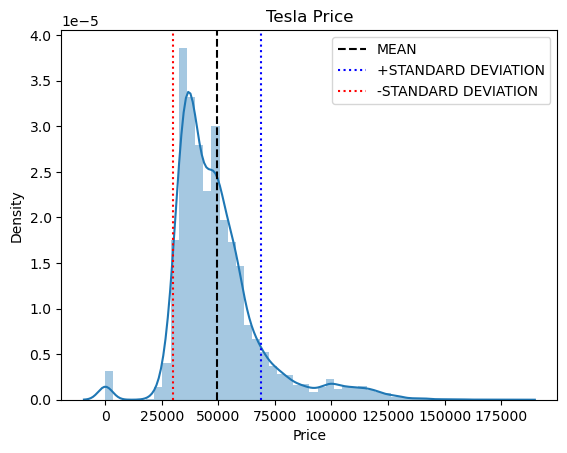

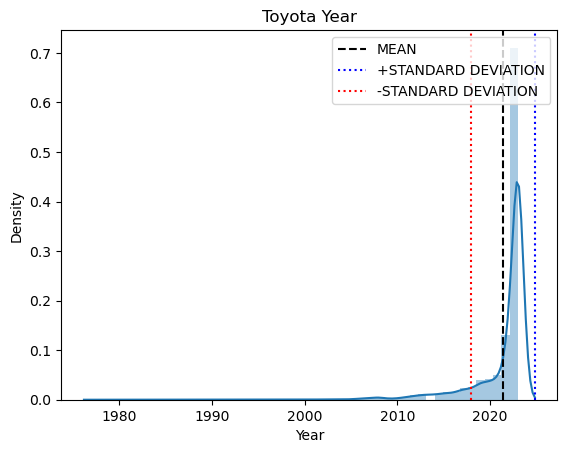

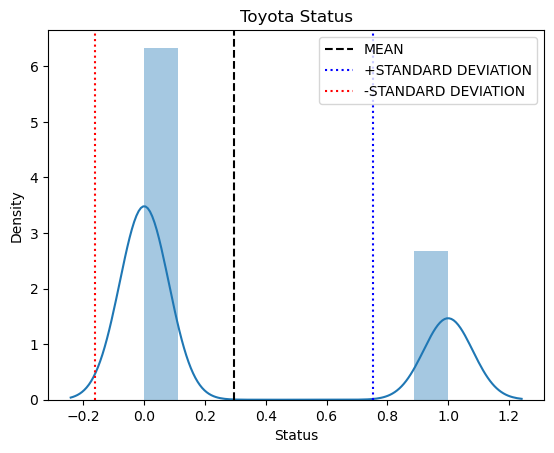

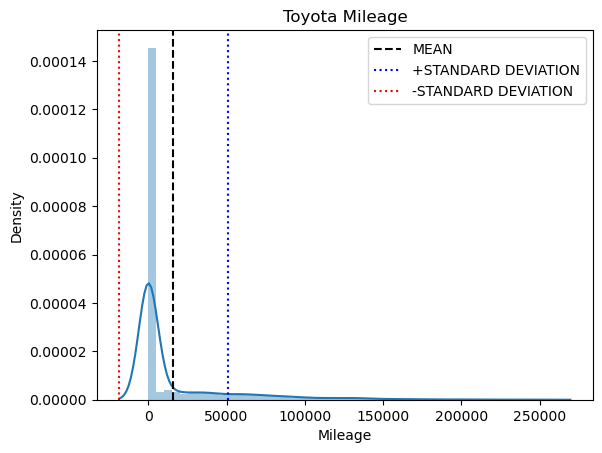

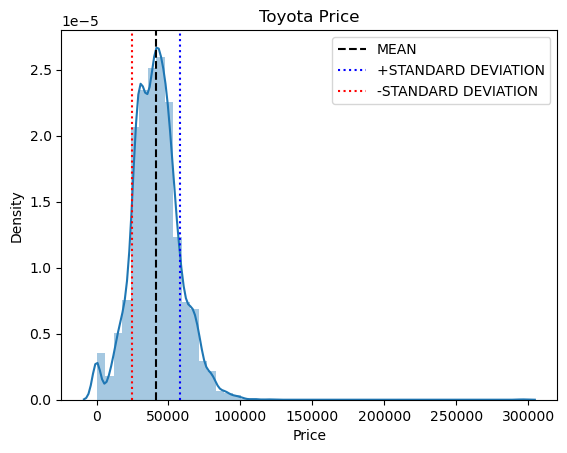

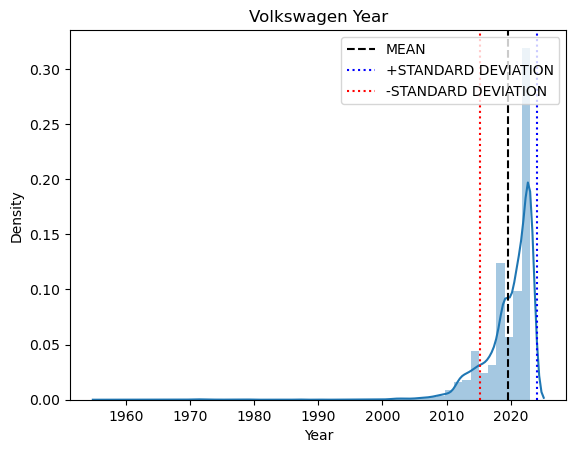

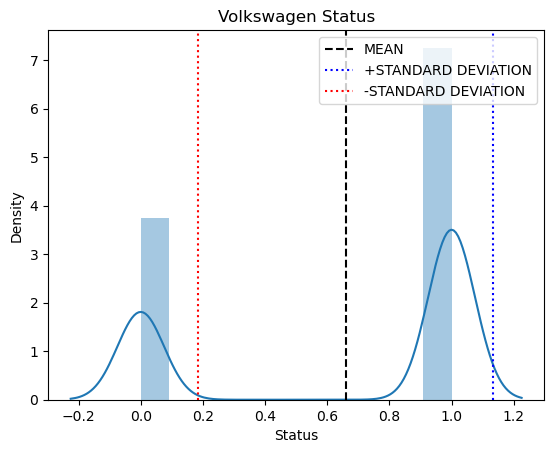

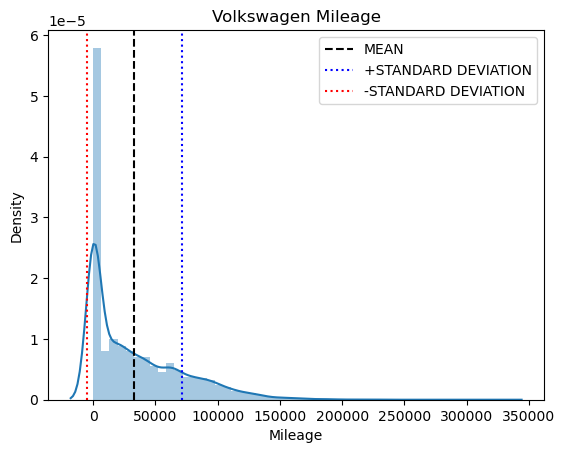

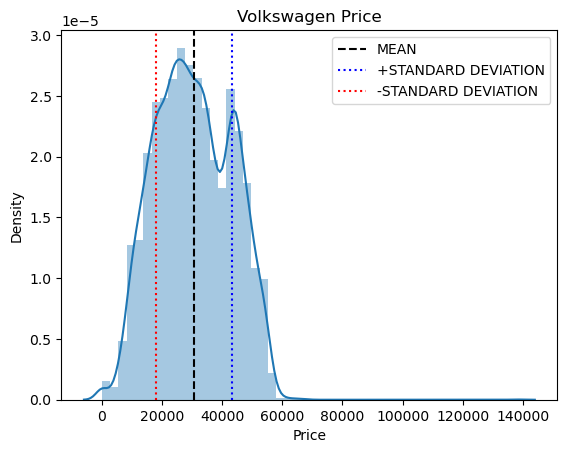

In [28]:
'''The above shows the mean price being so high for older cars is uniquely a consequence of Porsche. 
From 2000 on, we see uniform rise, as to be expected.'''

columns=['Year','Status','Mileage','Price']

for j in range(N):
    for i in columns:
        plt.figure()
        sns.distplot(Brand_df_list[j][i])
        plt.title( Brand_list[j]+' '+i)
        plt.subplots_adjust(hspace = .3)
        plt.axvline(Brand_df_list[j][i].mean(),color = "k",linestyle="dashed",label="MEAN")
        plt.axvline(Brand_df_list[j][i].mean()+Brand_df_list[j][i].std(),color = "b",linestyle="dotted",label="+STANDARD DEVIATION")
        plt.axvline(Brand_df_list[j][i].mean()-Brand_df_list[j][i].std(),color = "r",linestyle="dotted",label="-STANDARD DEVIATION")
        plt.legend(loc="upper right")

###### Let us now work towards building basic predictive models for price. 

# Price Predictive Models

In [29]:

y_list=[]

for i in range(N):
    y_list.append(Brand_df_list[i]['Price'])

X_list = []

for i in range(N):
    X_list.append(Brand_df_list[i].drop(['Price','Model','MSRP','Brand'],axis=1))

In [30]:
'''This is a really silly idea, decision trees are bad at regression. But let's just give it a shot'''

for i in range(N):
    X_train, X_test, y_train, y_test = train_test_split(X_list[i], y_list[i], test_size=0.3, random_state=68)
    
    model = tree.DecisionTreeClassifier().fit(X_train, y_train) 

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)

    print('Accuracy: ' + str(acc))

Accuracy: 0.018091521816246896
Accuracy: 0.05261382799325464
Accuracy: 0.014
Accuracy: 0.011478730587440918
Accuracy: 0.01762114537444934
Accuracy: 0.005622489959839358
Accuracy: 0.023782125047947834
Accuracy: 0.0043391188251001335
Accuracy: 0.04422442244224423
Accuracy: 0.00733822548365577
Accuracy: 0.029080334423845874
Accuracy: 0.0274442538593482
Accuracy: 0.006993006993006993


In [31]:
for i in range(N):
    
    linear_regressor = LinearRegression()
    linear_regressor.fit(X_list[i], y_list[i])
    
    y_pred = linear_regressor.predict(X_list[i])
    
    print(Brand_list[i]+' '+"Coeff", linear_regressor.coef_)

    print(Brand_list[i]+' '+"Intercept ", linear_regressor.intercept_)

    print(Brand_list[i]+' '+"Mean Squared error %.9f" % mean_squared_error(y_list[i],y_pred))

    print(Brand_list[i]+' '+"R_2 %.9f" % r2_score(y_list[i],y_pred))
    
    print('')
    
    print('')

Acura Coeff [ 2.18962606e+02 -8.62432415e+03 -2.10188512e-01]
Acura Intercept  -391369.7927968192
Acura Mean Squared error 178368099.321539223
Acura R_2 0.476772627


BMW Coeff [ 7.74241107e+02 -1.54842644e+04 -4.20800629e-01]
BMW Intercept  -1483629.2764563952
BMW Mean Squared error 833230225.797390223
BMW R_2 0.368769602


Chevrolet Coeff [ 4.32277909e+02 -3.23470973e+03 -2.16654645e-01]
Chevrolet Intercept  -821019.7564241756
Chevrolet Mean Squared error 350663150.641389310
Chevrolet R_2 0.222235105


Dodge Coeff [-7.26539319e+01 -8.23073127e+03 -2.17448207e-01]
Dodge Intercept  198466.19958852424
Dodge Mean Squared error 236314371.073932409
Dodge R_2 0.426850924


Ford Coeff [ 3.19401308e+02 -1.02245804e+04 -2.53535419e-01]
Ford Intercept  -586417.7657973961
Ford Mean Squared error 428779489.942143857
Ford R_2 0.129268104


Hyundai Coeff [ 1.56837125e+03 -3.18085217e+03 -9.16108471e-02]
Hyundai Intercept  -3134285.650463921
Hyundai Mean Squared error 63056761.167078868
Hyundai R_2 

In [32]:
for i in range(N):
    
    clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
    clfpoly2.fit(X_list[i], y_list[i])
    
    y_pred = clfpoly2.predict(X_list[i])

    print(Brand_list[i]+' '+"Mean Squared error %.9f" % mean_squared_error(y_list[i],y_pred))

    print(Brand_list[i]+' '+"R_2 %.9f" % r2_score(y_list[i],y_pred))
    
    print('')
    
    print('')

Acura Mean Squared error 168990182.781936795
Acura R_2 0.504281933


BMW Mean Squared error 790867636.974120855
BMW R_2 0.400862237


Chevrolet Mean Squared error 338129422.357698739
Chevrolet R_2 0.250034701


Dodge Mean Squared error 221108268.345862240
Dodge R_2 0.463731304


Ford Mean Squared error 426609013.598752975
Ford R_2 0.133675738


Hyundai Mean Squared error 61977017.891782477
Hyundai R_2 0.571840396


INFINITI Mean Squared error 101337020.953183338
INFINITI R_2 0.761132515


Lexus Mean Squared error 167017581.382214069
Lexus R_2 0.571358919


Mercedes-Benz Mean Squared error 1436428534.284496546
Mercedes-Benz R_2 0.091952897


Porsche Mean Squared error 4475856209.595991135
Porsche R_2 0.237846542


Tesla Mean Squared error 310539182.414592326
Tesla R_2 0.184868442


Toyota Mean Squared error 212189932.620050788
Toyota R_2 0.220962685


Volkswagen Mean Squared error 52714351.892564245
Volkswagen R_2 0.665624582




C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.14118e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=7.03753e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.13698e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.1206e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlg

###### INFINITI and Volkswagen appear to be the only two brands amenable to polynomial regression. Let us instead turn towards trying to predict brands instead. Intuitively, it seems like we should not be able to. My hypothesis being the feature space being relatively small, and prices general hugging the average by year.  

# Predicting Brand

In [33]:
data2 = data

for i in range(N):
    data2.loc[data2['Brand'] == Brand_list[i], 'Brand'] = i

data2.head()


,Model,Year,Status,Mileage,Price,MSRP,Brand
0,2022 Acura TLX A-Spec,2022,0.0,0.0,49445.0,"MSRP $49,445",0
1,2023 Acura RDX A-Spec,2023,0.0,0.0,50895.0,Not specified,0
2,2023 Acura TLX Type S,2023,0.0,0.0,57745.0,Not specified,0
3,2023 Acura TLX Type S,2023,0.0,0.0,57545.0,Not specified,0
4,2019 Acura MDX Sport Hybrid 3.0L w/Technology ...,2019,1.0,32675.0,40990.0,$600 price drop,0


In [34]:
y = data2['Brand']

y = y.astype('int')

X = data2.drop(['Model','MSRP','Brand'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
model = tree.DecisionTreeClassifier(random_state=67).fit(X_train, y_train) 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred,labels =[0,1,2,3,4,5,6,7,8,9,10,11]))

Accuracy: 0.403236488237496

Confusion Matrix:
[[1252  146   85  178    7  140  212  260    1   36  179   65  212]
 [ 162 1000  222  162   75   77  195  264   14  307  282  101  119]
 [  85  297  923  265  223  174  188  184   16  110   86  218  203]
 [ 178  165  315  838  227  187  197  239    4   92  148  120  297]
 [  29   96  257  222  369   42   74   87    6   24   12   74   68]
 [ 161   78  216  222   49  924   95   78    1    5   56  174  450]
 [ 251  196  163  242   78   82  839  262    2   74  144   93  177]
 [ 259  290  201  249   82   94  263  736    2  237  327  123  119]
 [   0    0    0    0    0    0    0    0 3061    0    0    0    0]
 [  28  281  111  100   15    1   62  207    1 1792  439   42   12]
 [ 174  284   83  137   11   36  128  350    0  383  971   45   62]
 [  78  127  279  119   70  171   80  138    4   32   51  369  216]
 [ 208  126  264  322   55  476  169  156    3   15   74  195  930]]

Classification Report:
              precision    recall  f1-score 

In [36]:
model = RandomForestClassifier(random_state=111, n_estimators=1111).fit(X_train, y_train) 
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ' + str(acc))
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('')
print('Classification Report:')
print(classification_report(y_test, y_pred,labels =[0,1,2,3,4,5,6,7,8,9,10,11]))

Accuracy: 0.4259552535345101

Confusion Matrix:
[[1290  127   73  149    8  130  218  279    1   43  185   43  227]
 [ 170  956  213  148   80   62  193  313   14  316  318   70  127]
 [  82  234  880  254  230  204  178  212   16  128  111  219  224]
 [ 204  136  232  849  233  190  172  243    4  130  190   93  331]
 [  26   84  224  220  391   39   78  103    8   27   15   74   71]
 [ 148   52  167  181   37  993   99   74    1    3   53  167  534]
 [ 253  140  147  217   75   87  901  296    2   78  151   66  190]
 [ 274  249  171  195   67   81  208  870    2  256  408   83  118]
 [   0    0    0    0    0    0    0    0 3061    0    0    0    0]
 [  12  229   73   53    8    1   50  183    1 1981  479   15    6]
 [ 169  190   58  111    6   40  109  290    0  385 1218   29   59]
 [  77  107  242  107   74  175   88  148    4   29   62  373  248]
 [ 204  109  208  271   48  533  161  164    3   12   77  173 1030]]

Classification Report:
              precision    recall  f1-score

In [37]:
'''Too similar to Linear regression, and too costly to run to warrant doing so. 
I leave this here for anyone who would like to try.'''

#classification = SVC(kernel = 'linear')

#classification.fit(X_train,y_train)

#y_pred = classification.predict(X_test)

#acc = accuracy_score(y_test, y_pred)

#print('Accuracy: ' + str(acc))
#print('')
#print('Confusion Matrix:')
#print(confusion_matrix(y_test, y_pred))
#print('')
#print('Classification Report:')
#print(classification_report(y_test, y_pred,labels =[0,1,2,3,4,5,6,7,8,9,10,11]))

'Too similar to Linear regression, and too costly to run to warrant doing so. \nI leave this here for anyone who would like to try.'

###### Final thoughts: Intriguing how well Mercedes Benz can be predicted, but otherwie accuracies are quite low. There is interesting analysis to be had on average price, but predicting price seems unlikely, at least with the nature of vintage cars (pre-2000s) being quite expensive. It may be worthwhile to further trim the data to only cars made after the 2000s and see how well things improve. All comments and suggestions welcome!